# Linear Regression with Gradient Descent using Dataset from Kaggle

This notebook is done as an assignment to build from scratch Linear regression model using gradient descent cost function on a custom dataset.

I have chosen the dataset from Kaggle: https://www.kaggle.com/datasets/andonians/random-linear-regression/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load and Prepare Data

### TRAIN DATASET

In [2]:
#Lets upload the train dataset
train = pd.read_csv('/content/LinearR_GD_train.csv')


In [3]:
#Check for details about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
#Needs to check for NULL value as its visible from the previous step
train[train['y'].isna()]

,x,y
213,3530.157369,NaN


In [5]:
#Dropping the ROW with Null value in any of the columns
train.dropna(inplace=True)

In [6]:
#Dropping the previous index and reindexing the DataFrame
train = train.reset_index(drop=True)

In [7]:
#And the result is
#RangeIndex: 699 entries, 0 to 698
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


In [8]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
x,699.0,50.014306,28.954560,0.000000,25.000000,49.00000,75.000000,100.000000
y,699.0,49.939869,29.109217,-3.839981,24.929968,48.97302,74.929911,108.871618


### TEST DATASET

In [21]:
test =  pd.read_csv("/content/LinearR_GD_test.csv")

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


## Correlation

<Axes: xlabel='x', ylabel='y'>

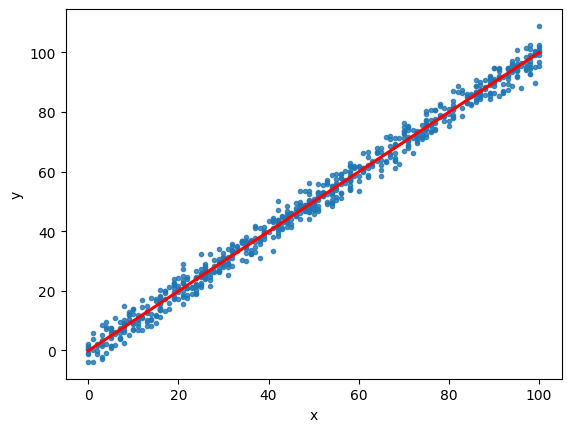

In [11]:
#Lets see the relationship between the feature and Target column of the dataset
#plt.scatter(train["x"], train["y"],s=5)
import seaborn as sns
sns.regplot(x="x", y="y", data=train, marker='.', line_kws={"color": "red"})

As expected, the feature and Target column shares a linear realtionship. Y increases as X increases.

## Gradient Descent - Defining Section

In [12]:
#This method computes the loss/cost/error by ->
#predicting y using the slope and intercept (intitally both set to 0)
#error in prediction = (predicted_y - actual_y)^2
#The error is summed up for all the datapoints
#its then divided with the number of datapoints to get the loss for
#that particular slope and intercept for the entire dataset
def compute_loss(x, y, slope, intercept):
    m = x.shape[0]
    total_loss = 0
    for i in range(m):
        y_pred = (slope * x[i]) + intercept
        total_loss = total_loss + (y_pred - y[i])**2

    #total_cost = (total_cost)/(2*m)
    total_loss = (total_loss/m)
    return total_loss

In [13]:
#Initialize slope and intercept
slope_init = 0
intercept_init = 0

#Lets check whats the loss at this slope and intercept
loss = compute_loss(train["x"], train["y"], slope_init, intercept_init)
print('loss for the dataset at slop and intercept at 0 is : ',loss)

loss for the dataset at slop and intercept at 0 is :  3340.12482617867


In [14]:
#This method computes the gradient for given slope and intercept
#This gradient value will be used to adjust to the current slope and intercept values
#to find the next slope and intercept value
def compute_gradient(x, y, slope, intercept):
    m = train.shape[0]
    d_slope = 0
    d_intercept = 0
    for i in range(m):
        y_pred = (slope * x[i]) + intercept
        d_slope = d_slope + (y_pred - y[i])*x[i]
        d_intercept = d_intercept + (y_pred - y[i])

    d_slope = (2*d_slope)/m
    d_intercept = (2*d_intercept)/m

    return d_slope, d_intercept

In [15]:
#This method is the core of the Cost Function - Gradient Descent
#It uses 2 Hyper parameters - Learning Rate and Number of Iterations
#The derivative/gradient of slope and intercept is calculated
#Then new slope and intercept values are obtained using the respective derivatives
#Loss/cost/error for prediction with the new slope and intercept is calculated
#The slope and intercept with less loss is captured
def gradient_descent(x, y, slope, intercept, lr, n_iter):
    m = x.shape[0]
    loss_list = []
    # Variables to track the minimum loss
    min_loss = float('inf')
    best_slope = 0
    best_intercept = 0
    for i in range(n_iter):
        d_slope, d_intercept = compute_gradient(x, y, slope, intercept)
        slope = slope - (lr * d_slope)
        intercept = intercept - (lr * d_intercept)
        loss = compute_loss(x, y, slope, intercept)
        loss_list.append(loss)
        # Check for minimum loss
        if loss < min_loss:
            min_loss = loss
            best_slope, best_intercept = slope, intercept

    return loss_list, best_slope, best_intercept

## Gradient Descent - Execution

Gradient Descent uses two hyper parameters:
- Learning Rate
- Number of Iterations



### Learning rate (λ)

Learning Rate (lamda) decides how fast or slow we move towards optimal weights for the model (best slope and best intercept)

Its important to get the desirable Learning Rate, because:
- Low and High LR results in wastage of time and resource
- Low LR means more training time, more training time means more cloud GPU cost
- High LR means, the model could miss the optimal weights and won't be able to predict accurately

A desirable learning rate is one that’s low enough so that the network converges to something useful but high enough so that it can be trained in a reasonable amount of time.


### Number of Iterations

Iterations needed by the algorith to arrive at the optimum weights. At each iteration the loss is reduced. We will get the optimal weights of the model when the loss is at the minimum.

Hence we can use GridSearchCV or RandomSearchCV for finding out the best values for these hyper parameters.


## LR - 0.0001 and Iterations - 100

In [ ]:
# Hyperparameters of Gradient Descent - learning rate and Number of Iterations
lr = 0.0001
n_iterations = 100

#Finding the best slope and intercept for the dataset using Gradient Descent Cost Function
loss, slope_gd, intercept_gd = gradient_descent(train["x"], train["y"], slope_init, intercept_init, lr, n_iterations)

In [ ]:
print('best slope : ',slope_gd)
print('best intercept : ',intercept_gd)


best slope :  0.9988343263437605
best intercept :  0.014352819895884914


### PLOT - Loss at each Iteration

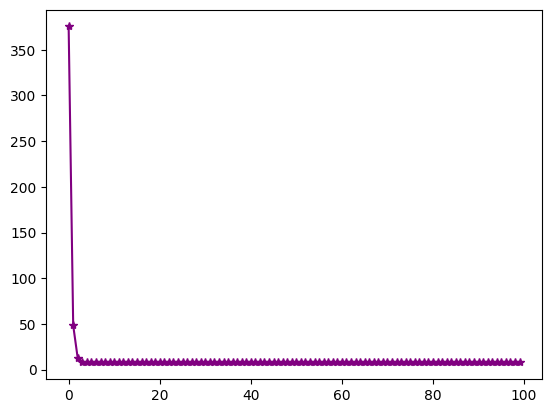

In [ ]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss, color='purple',marker='*')

### Prediction on TRAIN dataset using the best slope and Intercept

In [ ]:
m = train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = (slope_gd * train["x"][i]) + intercept_gd

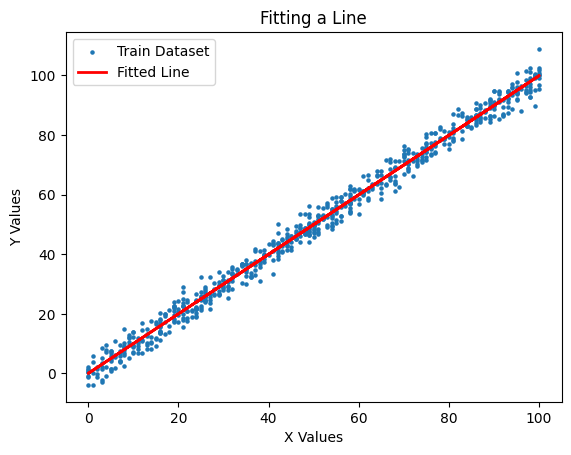

In [ ]:
#Combining line and scatter plot
plt.scatter(train["x"], train["y"], s = 5, label = "Train Dataset")
plt.plot(train["x"], predicted, c = "red", linewidth = 2, label = "Fitted Line")
plt.title("Fitting a Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

### Prediction on Test Dataset using the Best Slope and Intercept from Train Dataset

In [ ]:
test_m = test.shape[0]
test_prediction = np.zeros(test_m)
for i in range(test_m):
    test_prediction[i] = (slope_gd * test["x"][i]) + intercept_gd

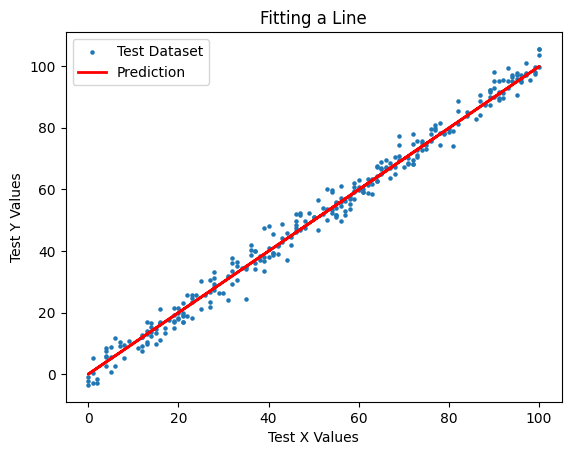

In [ ]:
#Combining line and scatter plot
plt.scatter(test["x"], test["y"], s = 5, label = "Test Dataset")
plt.plot(test["x"], test_prediction, c = "red", linewidth = 2, label = "Prediction")
plt.title("Fitting a Line")
plt.xlabel("Test X Values")
plt.ylabel("Test Y Values")
plt.legend()
plt.show()

### Validation

In [ ]:
#Mean Squared Error
error = 0
for i in range(test_m):
    error = error + (test["y"][i] - test_prediction[i])**2

error = error/test_m
print("Error found : ",error)

Error found :  9.457088807807887


In [ ]:
#R-squared accuracy
err_n = 0
err_d = 0
mean_y_test = np.mean(test["y"])
print("Mean of actual values is : ",mean_y_test)
for i in range(test_m):
    err_n = err_n + (test["y"][i] - test_prediction[i])**2
    err_d = err_d + (test["y"][i] - mean_y_test)**2

fracn = err_n/err_d
acc = 1 - fracn
print("Model accuracy : ",acc)
print("Model accuracy in percent : ",acc*100)

Mean of actual values is :  51.20505109827666
Model accuracy :  0.9887727543636508
Model accuracy in percent :  98.87727543636508


## LR - 0.0001 and Iterations - 500

In [16]:
# Hyperparameters of Gradient Descent - learning rate and Number of Iterations
lr = 0.0001
n_iterations = 500

#Finding the best slope and intercept for the dataset using Gradient Descent Cost Function
loss, slope_gd, intercept_gd = gradient_descent(train["x"], train["y"], slope_init, intercept_init, lr, n_iterations)


In [17]:
print('best slope : ',slope_gd)
print('best intercept : ',intercept_gd)
# For Easy Comparison
# LR = 0.0001, n_iterations = 100
# best slope :  0.9988343263437605
# best intercept :  0.014352819895884914

best slope :  0.9988705060624129
best intercept :  0.011937901538593676


### PLOT - Loss at each Iteration

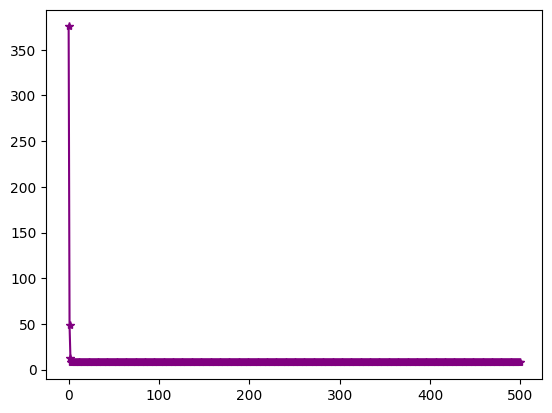

In [18]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss, color='purple',marker='*')

### Prediction on TRAIN dataset using the best slope and Intercept

In [19]:
m = train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = (slope_gd * train["x"][i]) + intercept_gd

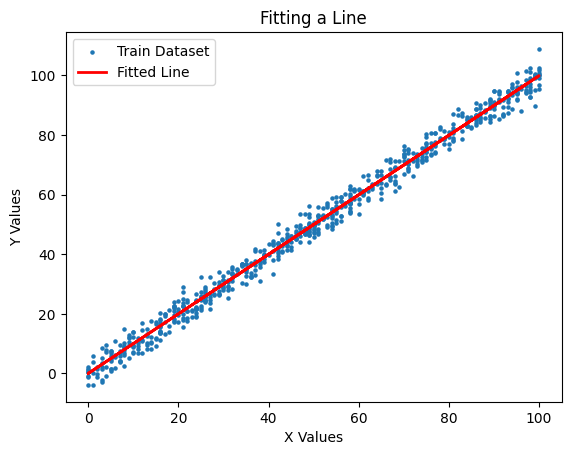

In [20]:
#Combining line and scatter plot
plt.scatter(train["x"], train["y"], s = 5, label = "Train Dataset")
plt.plot(train["x"], predicted, c = "red", linewidth = 2, label = "Fitted Line")
plt.title("Fitting a Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

### Prediction on Test Dataset using the Best Slope and Intercept from Train Dataset

In [23]:
test_m = test.shape[0]
test_prediction = np.zeros(test_m)
for i in range(test_m):
    test_prediction[i] = (slope_gd * test["x"][i]) + intercept_gd

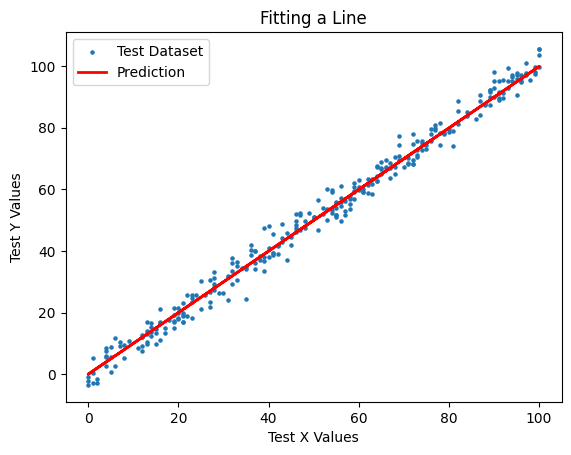

In [24]:
#Combining line and scatter plot
plt.scatter(test["x"], test["y"], s = 5, label = "Test Dataset")
plt.plot(test["x"], test_prediction, c = "red", linewidth = 2, label = "Prediction")
plt.title("Fitting a Line")
plt.xlabel("Test X Values")
plt.ylabel("Test Y Values")
plt.legend()
plt.show()

### Validation

In [25]:
#Mean Squared Error
error = 0
for i in range(test_m):
    error = error + (test["y"][i] - test_prediction[i])**2

error = error/test_m
print("Error found : ",error)

# LR = 0.0001 iterations = 100
# Error found :  9.457088807807887

Error found :  9.45654046744689


In [26]:
#R-squared accuracy
err_n = 0
err_d = 0
mean_y_test = np.mean(test["y"])
print("Mean of actual values is : ",mean_y_test)
for i in range(test_m):
    err_n = err_n + (test["y"][i] - test_prediction[i])**2
    err_d = err_d + (test["y"][i] - mean_y_test)**2

fracn = err_n/err_d
acc = 1 - fracn
print("Model accuracy : ",acc)
print("Model accuracy in percent : ",acc*100)

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887727543636508
# Model accuracy in percent :  98.87727543636508

Mean of actual values is :  51.20505109827666
Model accuracy :  0.9887734053411398
Model accuracy in percent :  98.87734053411398


## LR - 0.0001 and Iterations - 1000

In [27]:
# Hyperparameters of Gradient Descent - learning rate and Number of Iterations
lr = 0.0001
n_iterations = 1000

#Finding the best slope and intercept for the dataset using Gradient Descent Cost Function
loss, slope_gd, intercept_gd = gradient_descent(train["x"], train["y"], slope_init, intercept_init, lr, n_iterations)


In [28]:
print('best slope : ',slope_gd)
print('best intercept : ',intercept_gd)

# For Easy Comparison

# LR = 0.0001, n_iterations = 100
# best slope :  0.9988343263437605
# best intercept :  0.014352819895884914

# LR = 0.0001, n_iterations = 500
# best slope :  0.9988705060624129
# best intercept :  0.011937901538593676

best slope :  0.9989147221329964
best intercept :  0.008986573985034703


### PLOT - Loss at each iteration

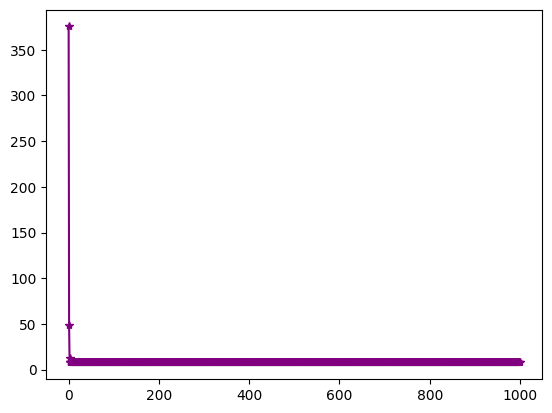

In [29]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss, color='purple',marker='*')

### Prediction on TRAIN dataset using the best slope and Intercept

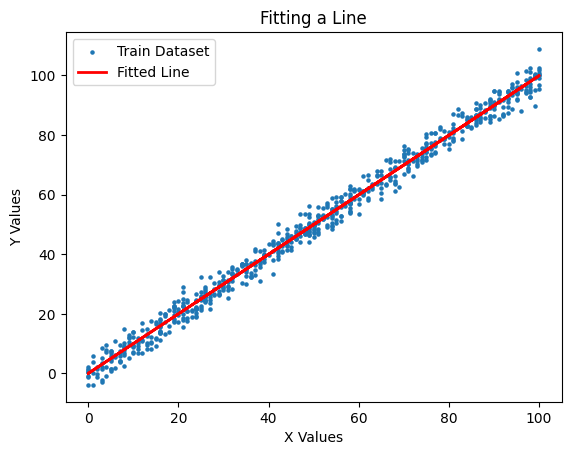

In [30]:
m = train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = (slope_gd * train["x"][i]) + intercept_gd

#Combining line and scatter plot
plt.scatter(train["x"], train["y"], s = 5, label = "Train Dataset")
plt.plot(train["x"], predicted, c = "red", linewidth = 2, label = "Fitted Line")
plt.title("Fitting a Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

### Prediction on Test Dataset using the Best Slope and Intercept from Train Dataset

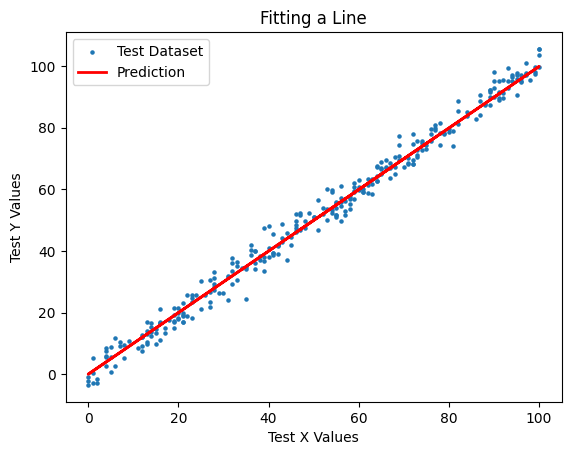

In [31]:
test_m = test.shape[0]
test_prediction = np.zeros(test_m)
for i in range(test_m):
    test_prediction[i] = (slope_gd * test["x"][i]) + intercept_gd

#Combining line and scatter plot
plt.scatter(test["x"], test["y"], s = 5, label = "Test Dataset")
plt.plot(test["x"], test_prediction, c = "red", linewidth = 2, label = "Prediction")
plt.title("Fitting a Line")
plt.xlabel("Test X Values")
plt.ylabel("Test Y Values")
plt.legend()
plt.show()

### Validation

In [32]:
#Mean Squared Error
error = 0
for i in range(test_m):
    error = error + (test["y"][i] - test_prediction[i])**2

error = error/test_m
print("Error found : ",error)

# LR = 0.0001 iterations = 100
# Error found :  9.457088807807887

# LR = 0.0001 iterations = 500
# Error found :  9.45654046744689

Error found :  9.455874095303923


In [33]:
#R-squared accuracy
err_n = 0
err_d = 0
mean_y_test = np.mean(test["y"])
print("Mean of actual values is : ",mean_y_test)
for i in range(test_m):
    err_n = err_n + (test["y"][i] - test_prediction[i])**2
    err_d = err_d + (test["y"][i] - mean_y_test)**2

fracn = err_n/err_d
acc = 1 - fracn
print("Model accuracy : ",acc)
print("Model accuracy in percent : ",acc*100)

# LR = 0.0001 iterations = 100

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887727543636508
# Model accuracy in percent :  98.87727543636508

# LR = 0.0001 iterations = 500

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887734053411398
# Model accuracy in percent :  98.87734053411398

Mean of actual values is :  51.20505109827666
Model accuracy :  0.9887741964433369
Model accuracy in percent :  98.87741964433368


## LR - 0.001 and Iterations - 100

In [34]:
# Hyperparameters of Gradient Descent - learning rate and Number of Iterations
lr = 0.001
n_iterations = 100

#Finding the best slope and intercept for the dataset using Gradient Descent Cost Function
loss, slope_gd, intercept_gd = gradient_descent(train["x"], train["y"], slope_init, intercept_init, lr, n_iterations)


In [35]:
print('best slope : ',slope_gd)
print('best intercept : ',intercept_gd)

# For Easy Comparison

# LR = 0.0001, n_iterations = 100
# best slope :  0.9988343263437605
# best intercept :  0.014352819895884914

# LR = 0.0001, n_iterations = 500
# best slope :  0.9988705060624129
# best intercept :  0.011937901538593676

# LR = 0.0001, n_iterations = 1000
# best slope :  0.9989147221329964
# best intercept :  0.008986573985034703


best slope :  6.670849169037078
best intercept :  0.09987973834091553


**INFERENCE**:
The best slope of (0.001, 100) matches nearly with the best slope of (0.0001,500)

### PLOT - Loss at each iteration

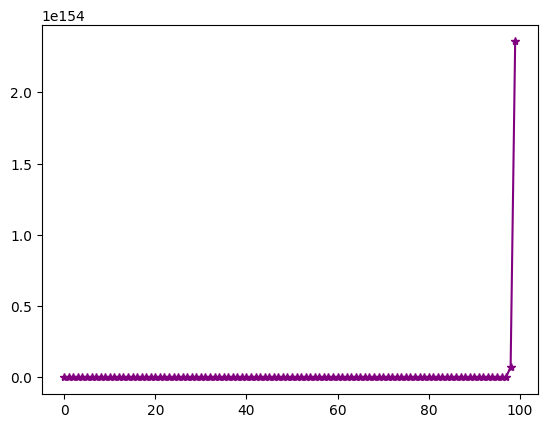

In [36]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss, color='purple',marker='*')

### Prediction on TRAIN dataset using the best slope and Intercept

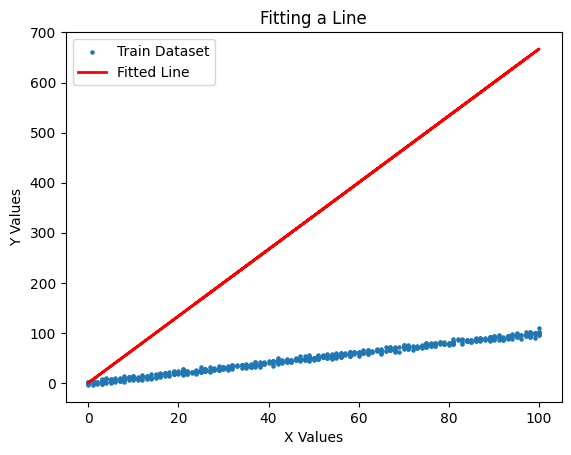

In [38]:
m = train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = (slope_gd * train["x"][i]) + intercept_gd

#Combining line and scatter plot
plt.scatter(train["x"], train["y"], s = 5, label = "Train Dataset")
plt.plot(train["x"], predicted, c = "red", linewidth = 2, label = "Fitted Line")
plt.title("Fitting a Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

### Prediction on Test Dataset using the Best Slope and Intercept from Train Dataset

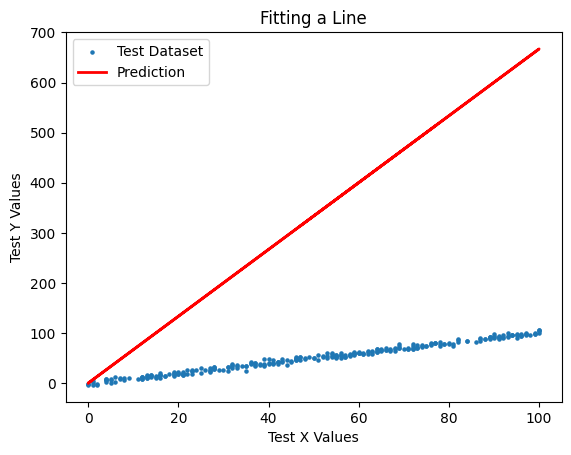

In [39]:
test_m = test.shape[0]
test_prediction = np.zeros(test_m)
for i in range(test_m):
    test_prediction[i] = (slope_gd * test["x"][i]) + intercept_gd

#Combining line and scatter plot
plt.scatter(test["x"], test["y"], s = 5, label = "Test Dataset")
plt.plot(test["x"], test_prediction, c = "red", linewidth = 2, label = "Prediction")
plt.title("Fitting a Line")
plt.xlabel("Test X Values")
plt.ylabel("Test Y Values")
plt.legend()
plt.show()

### Validation

In [40]:
#Mean Squared Error
error = 0
for i in range(test_m):
    error = error + (test["y"][i] - test_prediction[i])**2

error = error/test_m
print("Error found : ",error)

# LR = 0.0001 iterations = 100
# Error found :  9.457088807807887

# LR = 0.0001 iterations = 500
# Error found :  9.45654046744689

# LR = 0.0001 iterations = 1000
# Error found :  9.455874095303923

Error found :  109258.60108684206


In [42]:
#R-squared accuracy
err_n = 0
err_d = 0
mean_y_test = np.mean(test["y"])
print("Mean of actual values is : ",mean_y_test)
for i in range(test_m):
    err_n = err_n + (test["y"][i] - test_prediction[i])**2
    err_d = err_d + (test["y"][i] - mean_y_test)**2

fracn = err_n/err_d
acc = 1 - fracn
print("Model accuracy : ",acc)
print("Model accuracy in percent : ",acc*100)

# LR = 0.0001 iterations = 100

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887727543636508
# Model accuracy in percent :  98.87727543636508

# LR = 0.0001 iterations = 500

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887734053411398
# Model accuracy in percent :  98.87734053411398

# LR = 0.0001 iterations = 1000

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887741964433369
# Model accuracy in percent :  98.87741964433368

Mean of actual values is :  51.20505109827666
Model accuracy :  -128.7093827936892
Model accuracy in percent :  -12870.93827936892


## LR - 0.001 and Iterations - 500

### Scaling to address RunTimeWarning: overflow encountered

Had to scale the features as encountered below error while executing gradient descent:

RuntimeWarning: overflow encountered in scalar add
  total_loss = total_loss + (y_pred - y[i])**2

From the below suggestions, i tried with scaling. I did not want to lower the learning rate as I am experimenting with different rates and iterations.

**Summary of Steps to Debug and Fix:**

- Check for large values in y_pred and y[i].
- Lower the learning rate if using gradient descent.
- Scale your input features to avoid large gradients.
- Use np.clip to limit loss calculations and prevent overflow.
- Consider switching to higher precision data types (e.g., float64).
- Check for NaN or inf values and ensure numerical stability.



In [55]:
X = train.iloc[:,:-1].values

In [56]:
X.shape

(699, 1)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Hyperparameters of Gradient Descent - learning rate and Number of Iterations
lr = 0.001
n_iterations = 500

loss = []
slope_gd = 0
intercept_gd = 0

#Finding the best slope and intercept for the dataset using Gradient Descent Cost Function
loss, slope_gd, intercept_gd = gradient_descent(X_scaled, train["y"], slope_init, intercept_init, lr, n_iterations)


In [60]:
print('best slope : ',slope_gd[0])
print('best intercept : ',intercept_gd[0])

# For Easy Comparison

# LR = 0.0001, n_iterations = 100
# best slope :  0.9988343263437605
# best intercept :  0.014352819895884914

# LR = 0.0001, n_iterations = 500
# best slope :  0.9988705060624129
# best intercept :  0.011937901538593676

# LR = 0.0001, n_iterations = 1000
# best slope :  0.9989147221329964
# best intercept :  0.008986573985034703

# LR = 0.001, n_iterations = 100
# best slope :  6.670849169037078
# best intercept :  0.09987973834091553

best slope :  18.312341033874468
best intercept :  31.586405184220503


### PLOT - Loss at each iteration

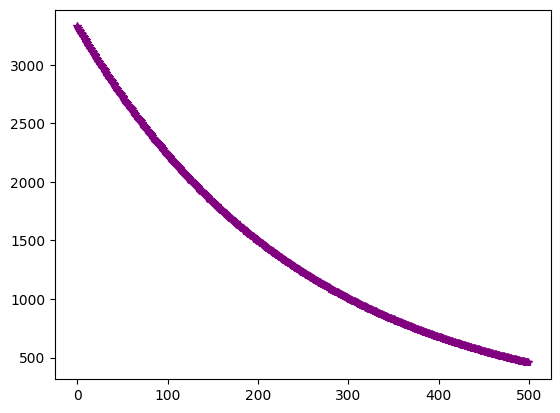

In [61]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss, color='purple',marker='*')

### Prediction on TRAIN dataset using the best slope and Intercept

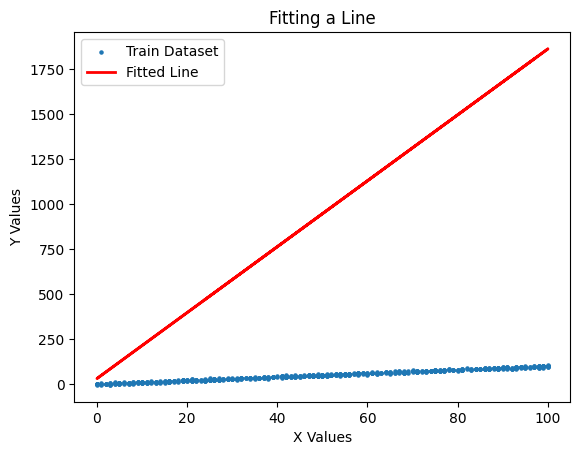

In [62]:
m = train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = (slope_gd[0] * train["x"][i]) + intercept_gd[0]

#Combining line and scatter plot
plt.scatter(train["x"], train["y"], s = 5, label = "Train Dataset")
plt.plot(train["x"], predicted, c = "red", linewidth = 2, label = "Fitted Line")
plt.title("Fitting a Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

### Prediction on Test Dataset using the Best Slope and Intercept from Train Dataset

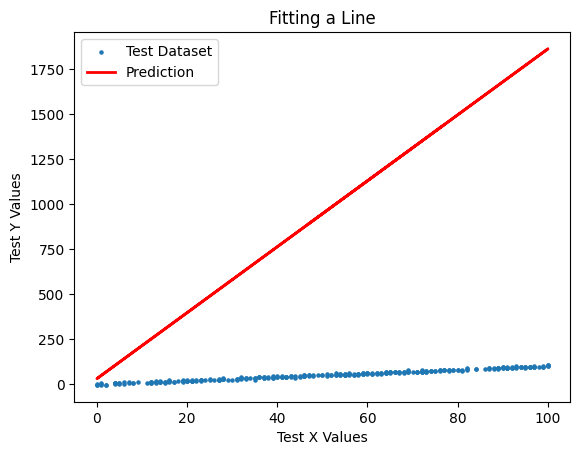

In [63]:
test_m = test.shape[0]
test_prediction = np.zeros(test_m)
for i in range(test_m):
    test_prediction[i] = (slope_gd[0] * test["x"][i]) + intercept_gd[0]

#Combining line and scatter plot
plt.scatter(test["x"], test["y"], s = 5, label = "Test Dataset")
plt.plot(test["x"], test_prediction, c = "red", linewidth = 2, label = "Prediction")
plt.title("Fitting a Line")
plt.xlabel("Test X Values")
plt.ylabel("Test Y Values")
plt.legend()
plt.show()

### Validation

In [64]:
#Mean Squared Error
error = 0
for i in range(test_m):
    error = error + (test["y"][i] - test_prediction[i])**2

error = error/test_m
print("Error found : ",error)

# LR = 0.0001 iterations = 100
# Error found :  9.457088807807887

# LR = 0.0001 iterations = 500
# Error found :  9.45654046744689

# LR = 0.0001 iterations = 1000
# Error found :  9.455874095303923

# LR = 0.001 iterations = 100
# Error found :  109258.60108684206

Error found :  1076158.8233160893


In [65]:
#R-squared accuracy
err_n = 0
err_d = 0
mean_y_test = np.mean(test["y"])
print("Mean of actual values is : ",mean_y_test)
for i in range(test_m):
    err_n = err_n + (test["y"][i] - test_prediction[i])**2
    err_d = err_d + (test["y"][i] - mean_y_test)**2

fracn = err_n/err_d
acc = 1 - fracn
print("Model accuracy : ",acc)
print("Model accuracy in percent : ",acc*100)

# LR = 0.0001 iterations = 100

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887727543636508
# Model accuracy in percent :  98.87727543636508

# LR = 0.0001 iterations = 500

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887734053411398
# Model accuracy in percent :  98.87734053411398

# LR = 0.0001 iterations = 1000

# Mean of actual values is :  51.20505109827666
# Model accuracy :  0.9887741964433369
# Model accuracy in percent :  98.87741964433368

# LR = 0.001 iterations = 100

# Mean of actual values is :  51.20505109827666
# Model accuracy :  -128.7093827936892
# Model accuracy in percent :  -12870.93827936892

Mean of actual values is :  51.20505109827666
Model accuracy :  -1276.5918359906884
Model accuracy in percent :  -127659.18359906884


# LR - 0.01 and Iterations - 100

In [66]:
# Hyperparameters of Gradient Descent - learning rate and Number of Iterations
lr = 0.01
n_iterations = 100

loss = []
slope_gd = 0
intercept_gd = 0

#Finding the best slope and intercept for the dataset using Gradient Descent Cost Function
loss, slope_gd, intercept_gd = gradient_descent(X_scaled, train["y"], slope_init, intercept_init, lr, n_iterations)


In [67]:
print('best slope : ',slope_gd[0])
print('best intercept : ',intercept_gd[0])

# For Easy Comparison

# LR = 0.0001, n_iterations = 100
# best slope :  0.9988343263437605
# best intercept :  0.014352819895884914

# LR = 0.0001, n_iterations = 500
# best slope :  0.9988705060624129
# best intercept :  0.011937901538593676

# LR = 0.0001, n_iterations = 1000
# best slope :  0.9989147221329964
# best intercept :  0.008986573985034703

# LR = 0.001, n_iterations = 100
# best slope :  6.670849169037078
# best intercept :  0.09987973834091553

# LR = 0.001, n_iterations = 500
# best slope :  18.312341033874468
# best intercept :  31.586405184220503

best slope :  25.11312117495716
best intercept :  43.31686589962962


### PLOT - Loss at each iteration

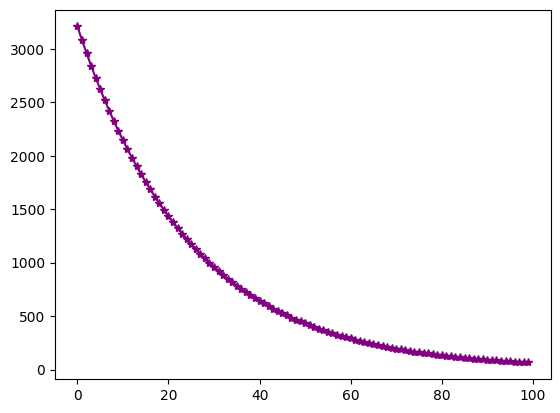

In [68]:
# Plotting the loss at each iterations
plt.plot(range(n_iterations), loss, color='purple',marker='*')

### Prediction on TRAIN dataset using the best slope and Intercept

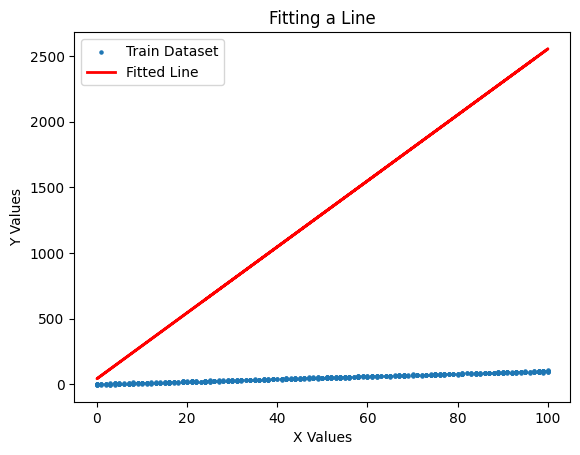

In [69]:
m = train.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = (slope_gd[0] * train["x"][i]) + intercept_gd[0]

#Combining line and scatter plot
plt.scatter(train["x"], train["y"], s = 5, label = "Train Dataset")
plt.plot(train["x"], predicted, c = "red", linewidth = 2, label = "Fitted Line")
plt.title("Fitting a Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

# SUMMARY

From the above implemetation, it can be understood that the best learing rate is 0.0001 and the best iteration is 100.

While increasing learning rate, we experienced exploding gradient issue.

In machine learning, if the learning rate is too high, the model parameters (weights) may grow exponentially, causing the predictions (y_pred) to also explode, leading to overflow during loss calculation.

While increasing the iterations for learning rate at 0.0001, the accuracy of the model was best at the minimum iteration, ie. at 100

While increasing the learning rate, we could see that the loss is more and predictions were not accurate and the model accuracy going to negative.